In [1]:
!pip install "tensorflow<2.11";
import numpy as np
import matplotlib.pyplot as plt
 
%matplotlib inline
 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img


2024-06-17 16:05:39.251433: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 16:05:39.932388: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-17 16:05:40.044841: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-17 16:05:40.044870: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
"""import zipfile
import os

# Define the path to the zip file and the directory to unzip to
zip_file_path = 'clothing-dataset-small-master.zip'
unzip_dir = 'clothing-dataset-small-master'

# Create the directory if it doesn't exist
os.makedirs(unzip_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print(f"Extracted all files to {unzip_dir}") """


'import zipfile\nimport os\n\n# Define the path to the zip file and the directory to unzip to\nzip_file_path = \'clothing-dataset-small-master.zip\'\nunzip_dir = \'clothing-dataset-small-master\'\n\n# Create the directory if it doesn\'t exist\nos.makedirs(unzip_dir, exist_ok=True)\n\n# Unzip the file\nwith zipfile.ZipFile(zip_file_path, \'r\') as zip_ref:\n    zip_ref.extractall(unzip_dir)\n\nprint(f"Extracted all files to {unzip_dir}") '

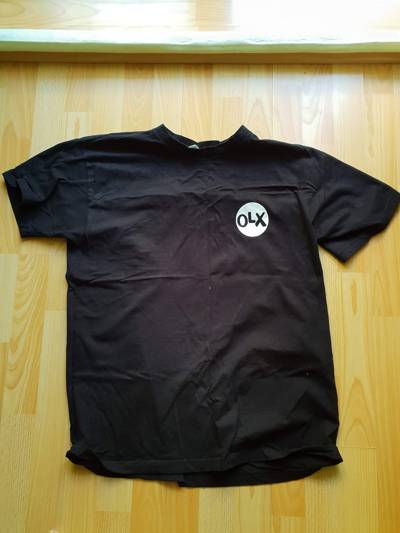

In [3]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [4]:
img = load_img(fullname, target_size=(299, 299))

In [5]:
x = np.array(img)
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [6]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
 
# weights = "imagenet" means we want to use pre-trained network that was trained on imagenet
 
model = Xception(
    weights="imagenet",
    input_shape=(299, 299, 3)
)

2024-06-17 16:05:43.690624: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-06-17 16:05:43.690661: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-17 16:05:43.690689: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mlzoomcamp): /proc/driver/nvidia/version does not exist
2024-06-17 16:05:43.691666: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [8]:
X = preprocess_input(X)
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804]],

       [[ 0.47450984,  0.4039216 , -0.1372549 ],
        [ 0.4666667 ,  0.39607847, -0.14509803],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [9]:
pred = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [10]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792447),
  ('n02916936', 'bulletproof_vest', 0.039600387),
  ('n04370456', 'sweatshirt', 0.035299577),
  ('n03710637', 'maillot', 0.01088412),
  ('n04525038', 'velvet', 0.001805761)]]

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [12]:
X, y = next(train_ds)

In [13]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [14]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)
 
base_model.trainable = False

In [15]:
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs)
outputs = base
model = keras.Model(inputs, outputs)
preds = model.predict(X)



1/1 [==============================] - 2s 2s/step


In [16]:
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs)
 
pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)
outputs = vectors
 
model = keras.Model(inputs, outputs)
preds = model.predict(X)

1/1 [==============================] - 2s 2s/step


In [17]:
inputs = keras.Input(shape=(150, 150, 3))
 
base = base_model(inputs)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = vectors
model = keras.Model(inputs, outputs)
 
preds = model.predict(X)
preds.shape

1/1 [==============================] - 2s 2s/step


(32, 2048)

In [18]:
inputs = keras.Input(shape=(150, 150, 3))
 
base = base_model(inputs)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)
 
preds = model.predict(X)
preds.shape

1/1 [==============================] - 2s 2s/step


(32, 10)

In [19]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
 
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
 
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [20]:
# history = model.fit(train_ds, epochs=5, validation_data=val_ds)

In [21]:
model.save_weights('model_v1.h5', save_format='h5')
 
# Keras uses this template for saving files.
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(epoch=3, val_accuracy=0.84)
 

'xception_v1_03_0.840.h5'

In [22]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [23]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
 
    base_model.trainable = False
 
    #########################################
 
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
     
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
     
    outputs = keras.layers.Dense(10)(inner)
     
    model = keras.Model(inputs, outputs)
     
    #########################################
 
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
 
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
     
    return model


In [24]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
 
    base_model.trainable = False
 
    #########################################
 
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
     
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
     
    outputs = keras.layers.Dense(10)(drop)
     
    model = keras.Model(inputs, outputs)
     
    #########################################
 
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
 
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
     
    return model


In [25]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=10,
    height_shift_range=10,
    shear_range=10,
    zoom_range=0.1,
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=True,
)

In [26]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True,
)
 
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)
 
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [27]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):
 
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )
 
    base_model.trainable = False
 
    #########################################
 
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
     
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
     
    outputs = keras.layers.Dense(10)(drop)
     
    model = keras.Model(inputs, outputs)
     
    #########################################
 
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
 
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
     
    return model


In [28]:
input_size = 299
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)
 
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)
 
 
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [29]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [30]:
learning_rate = 0.0005
size = 100
droprate = 0.2
 
model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

In [31]:
"""learning_rate = 0.0005
size = 100
droprate = 0.2
 
model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)
 
history = model.fit(train_ds, epochs=1, validation_data=val_ds,
                   callbacks=[checkpoint]) """

'learning_rate = 0.0005\nsize = 100\ndroprate = 0.2\n \nmodel = make_model(\n    input_size=input_size,\n    learning_rate=learning_rate,\n    size_inner=size,\n    droprate=droprate\n)\n \nhistory = model.fit(train_ds, epochs=1, validation_data=val_ds,\n                   callbacks=[checkpoint]) '

In [32]:
import tensorflow as tf
from tensorflow import keras
 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input


In [33]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [34]:
model = keras.models.load_model('xception_v4_1_05_0.877.h5')

In [35]:
model.evaluate(test_ds)

12/12 [==============================] - 81s 6s/step - loss: 0.2669 - accuracy: 0.9059


[0.26685720682144165, 0.9059139490127563]

In [36]:
import numpy as np
 
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
 
img = load_img(path, target_size=(299, 299))
 
x = np.array(img)
X = np.array([x])
X.shape
 
# Output: (1, 299, 299, 3)
 
X = preprocess_input(X)
pred = model.predict(X)

1/1 [==============================] - 1s 936ms/step
